## General Processing

Workflow:
1. General filter
2. Outliers detection
3. Train and test set splitting
4. Missing values imputation
5. Add Score values
6. Output the train and test data




### Load master dataset

In [40]:
import pandas as pd
import os
from thesis_helper import *
from sklearn.impute import SimpleImputer
from dataset_path import output_path,mimic_iv_path
path = output_path
df_master = pd.read_csv(os.path.join(path, 'master_dataset.csv'))

In [41]:
percent_missing = df_master.isnull().sum() * 100 / len(df_master)
missing_value_df = pd.DataFrame({'column_name': df_master.columns,
                                 'percent_missing': percent_missing})
missing_value_df.to_csv('c.csv',index = False)

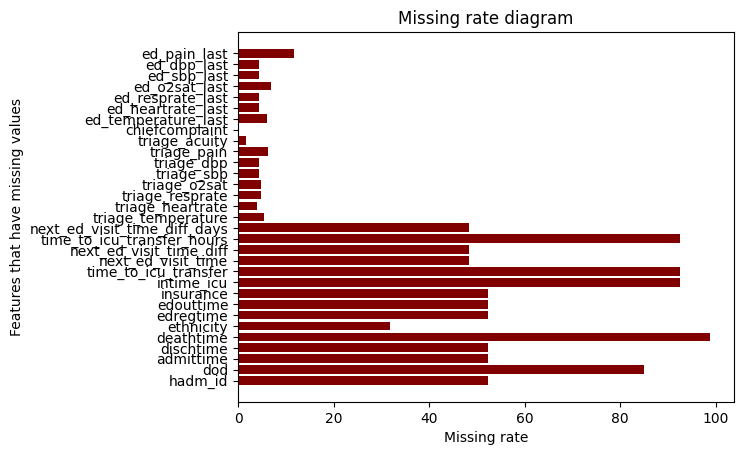

In [42]:
import matplotlib.pyplot as plt
s = missing_value_df[missing_value_df['percent_missing']!= 0]

plt.barh(s['column_name'],s['percent_missing'], color ='maroon')
 
plt.xlabel("Missing rate")
plt.ylabel("Features that have missing values")
plt.title("Missing rate diagram")
# plt.xticks(rotation=90)
plt.show()


In [43]:
pd.set_option('display.max_columns', 200) 
df_master.head()

,index,subject_id,hadm_id,stay_id,intime,outtime,gender,race,arrival_transport,disposition,anchor_age,anchor_year,dod,admittime,dischtime,deathtime,ethnicity,edregtime,edouttime,insurance,in_year,age,outcome_inhospital_mortality,ed_los,intime_icu,time_to_icu_transfer,outcome_icu_transfer_12h,outcome_hospitalization,outcome_critical,n_ed_30d,n_ed_90d,n_ed_365d,next_ed_visit_time,next_ed_visit_time_diff,outcome_ed_revisit_3d,n_hosp_30d,n_hosp_90d,n_hosp_365d,n_icu_30d,n_icu_90d,n_icu_365d,ed_los_hours,time_to_icu_transfer_hours,next_ed_visit_time_diff_days,triage_temperature,triage_heartrate,triage_resprate,triage_o2sat,triage_sbp,triage_dbp,triage_pain,triage_acuity,chiefcomplaint,chiefcom_chest_pain,chiefcom_abdominal_pain,chiefcom_headache,chiefcom_shortness_of_breath,chiefcom_back_pain,chiefcom_cough,chiefcom_nausea_vomiting,chiefcom_fever_chills,chiefcom_syncope,chiefcom_dizziness,cci_MI,cci_CHF,cci_PVD,cci_Stroke,cci_Dementia,cci_Pulmonary,cci_Rheumatic,cci_PUD,cci_Liver1,cci_DM1,cci_DM2,cci_Paralysis,cci_Renal,cci_Cancer1,cci_Liver2,cci_Cancer2,cci_HIV,eci_CHF,eci_Arrhythmia,eci_Valvular,eci_PHTN,eci_PVD,eci_HTN1,eci_HTN2,eci_Paralysis,eci_NeuroOther,eci_Pulmonary,eci_DM1,eci_DM2,eci_Hypothyroid,eci_Renal,eci_Liver,eci_PUD,eci_HIV,eci_Lymphoma,eci_Tumor2,eci_Tumor1,eci_Rheumatic,eci_Coagulopathy,eci_Obesity,eci_WeightLoss,eci_FluidsLytes,eci_BloodLoss,eci_Anemia,eci_Alcohol,eci_Drugs,eci_Psychoses,eci_Depression,ed_temperature_last,ed_heartrate_last,ed_resprate_last,ed_o2sat_last,ed_sbp_last,ed_dbp_last,ed_pain_last,n_med,n_medrecon
0,0,10000032,22595853.0,33258284,2180-05-06 19:17:00,2180-05-06 23:30:00,F,WHITE,AMBULANCE,ADMITTED,52,2180,2180-09-09,2180-05-06 22:23:00,2180-05-07 17:15:00,NaN,WHITE,2180-05-06 19:17:00,2180-05-06 23:30:00,Other,2180,52,False,0 days 04:13:00,NaN,NaN,False,True,False,0,0,0,2180-06-26 15:54:00,50 days 16:24:00,False,0,0,0,0,0,0,4.22,NaN,50.68,98.4,70.0,16.0,97.0,106.0,63.0,0.0,3.0,"Abd pain, Abdominal distention",False,True,False,False,False,False,False,False,False,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,97.7,79.0,16.0,98.0,107.0,60.0,0.0,0.0,9.0
1,1,10000032,22841357.0,38112554,2180-06-26 15:54:00,2180-06-26 21:31:00,F,WHITE,AMBULANCE,ADMITTED,52,2180,2180-09-09,2180-06-26 18:27:00,2180-06-27 18:49:00,NaN,WHITE,2180-06-26 15:54:00,2180-06-26 21:31:00,Medicaid,2180,52,False,0 days 05:37:00,NaN,NaN,False,True,False,0,1,1,2180-07-22 16:24:00,25 days 18:53:00,False,0,1,1,0,0,0,5.62,NaN,25.79,98.9,88.0,18.0,97.0,116.0,88.0,10.0,3.0,Abdominal distention,False,False,False,False,False,False,False,False,False,False,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,97.9,86.0,17.0,93.0,96.0,57.0,5.0,3.0,12.0
2,3,10000032,29079034.0,32952584,2180-07-22 16:24:00,2180-07-23 05:54:00,F,WHITE,AMBULANCE,HOME,52,2180,2180-09-09,2180-07-23 12:35:00,2180-07-25 17:55:00,NaN,WHITE,2180-07-23 05:54:00,2180-07-23 14:00:00,Medicaid,2180,52,False,0 days 13:30:00,2180-07-23 14:00:00,0 days 08:06:00,True,True,True,1,2,2,2180-07-23 05:54:00,0 days 00:00:00,True,1,2,2,0,0,0,13.50,8.1,0.00,97.8,87.0,14.0,97.0,71.0,43.0,7.0,2.0,Hypotension,False,False,False,False,False,False,False,False,False,False,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,98.2,85.0,18.0,98.0,81.0,38.0,0.0,2.0,14.0
3,4,10000032,29079034.0,39399961,2180-07-23 05:54:00,2180-07-23 14:00:00,F,WHITE,AMBULANCE,ADMITTED,52,2180,2180-09-09,2180-07-23 12:35:00,2180-07-25 17:55:00,NaN,WHITE,2180-07-23 05:54:00,2180-07-23 14:00:00,Medicaid,2180,52,False,0 days 08:06:00,2180-07-23 14:00:00,0 days 00:00:00,True,True,True,2,3,3,2180-08-05 20:58:00,13 days 06:58:00,False,1,2,2,0,0,0,8.10,0.0,13.29,98.7,77.0,16.0,98.0,96.0,50.0,13.0,2.0,"Abdominal distention, Abd pain, LETHAGIC",False,True,False,False,False,False,False,False,False,False,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1

### 1. General filter - Age, triage_acuity, ed

In [44]:
print('Before filtering for "age" >= 18 : master dataset size = ', len(df_master))
df_master = df_master[df_master['age'] >= 18]
print('After filtering for "age" >= 18 : master dataset size = ', len(df_master))

Before filtering for "age" >= 18 : master dataset size =  425087
After filtering for "age" >= 18 : master dataset size =  425087


In [45]:
# na_master = df_master[df_master['triage_acuity'].isnull()]
# len(na_master)

In [46]:
print('Before filtering for non-null "triage_acuity" >= 18 : master dataset size = ', len(df_master))
df_master = df_master[df_master['triage_acuity'].notnull()]
print('After filtering for non-null "triage_acuity" >= 18 : master dataset size = ', len(df_master))

Before filtering for non-null "triage_acuity" >= 18 : master dataset size =  425087
After filtering for non-null "triage_acuity" >= 18 : master dataset size =  418100


### 2. Outlier Detection 

In [47]:
# from mimic-extract
vitals_valid_range = {
    'temperature': {'outlier_low': 14.2, 'valid_low': 26, 'valid_high': 45, 'outlier_high':47},
    'heartrate': {'outlier_low': 0, 'valid_low': 0, 'valid_high': 350, 'outlier_high':390},
    'resprate': {'outlier_low': 0, 'valid_low': 0, 'valid_high': 300, 'outlier_high':330},
    'o2sat': {'outlier_low': 0, 'valid_low': 0, 'valid_high': 100, 'outlier_high':150},
    'sbp': {'outlier_low': 0, 'valid_low': 0, 'valid_high': 375, 'outlier_high':375},
    'dbp': {'outlier_low': 0, 'valid_low': 0, 'valid_high': 375, 'outlier_high':375},
    'pain': {'outlier_low': 0, 'valid_low': 0, 'valid_high': 10, 'outlier_high':10},
    'acuity': {'outlier_low': 1, 'valid_low': 1, 'valid_high': 5, 'outlier_high':5},
}

In [49]:
df_master = convert_temp_to_celcius(df_master)

In [50]:
def display_outliers_count1(df_master, vitals_valid_range):
    display_df = pd.DataFrame(columns=['variable', 'low end outlier',  'high end outlier'])
    for column in df_master.columns:
        column_type = column.split('_')[1] if len(column.split('_')) > 1 else None
        if column_type in vitals_valid_range:
            column_range = vitals_valid_range[column_type]
            df_extended = pd.DataFrame({'variable': column,
                   '< outlier_low': len(df_master[df_master[column] < column_range['outlier_low']]),
                   '[outlier_low, valid_low)': len(df_master[(column_range['outlier_low'] <= df_master[column])
                                                             & (df_master[column] < column_range['valid_low'])]),
                   '[valid_low, valid_high]': len(df_master[(column_range['valid_low'] <= df_master[column])
                                                            & (df_master[column] <= column_range['valid_high'])]),
                   '(valid_high, outlier_high]': len(df_master[(column_range['valid_high'] < df_master[column])
                                                               & (df_master[column] <= column_range['outlier_high'])]),
                   '> outlier_high': len(df_master[df_master[column] > column_range['outlier_high']])
            })
            display_df = display_df._append({'variable': column,
                   'low end outlier': len(df_master[df_master[column] < column_range['outlier_low']]),

                   'high end outlier': len(df_master[df_master[column] > column_range['outlier_high']])
            }, ignore_index=True)
            # display_df = pd.concat([display_df,df_extended], ignore_index=True)
    return display_df

In [51]:

df_master = remove_outliers(df_master, vitals_valid_range)

### 3. Dataset Split (train:0.8, test: 0.2, use seed to fix)

In [52]:
df_train=df_master.sample(frac=0.8,random_state=10) #random state is a seed value
df_test=df_master.drop(df_train.index)

In [53]:
print('Training dataset size = ', len(df_train))
print('Testing dataset size = ', len(df_test))

Training dataset size =  334480
Testing dataset size =  83620


In [54]:
df_train.head()

,index,subject_id,hadm_id,stay_id,intime,outtime,gender,race,arrival_transport,disposition,anchor_age,anchor_year,dod,admittime,dischtime,deathtime,ethnicity,edregtime,edouttime,insurance,in_year,age,outcome_inhospital_mortality,ed_los,intime_icu,time_to_icu_transfer,outcome_icu_transfer_12h,outcome_hospitalization,outcome_critical,n_ed_30d,n_ed_90d,n_ed_365d,next_ed_visit_time,next_ed_visit_time_diff,outcome_ed_revisit_3d,n_hosp_30d,n_hosp_90d,n_hosp_365d,n_icu_30d,n_icu_90d,n_icu_365d,ed_los_hours,time_to_icu_transfer_hours,next_ed_visit_time_diff_days,triage_temperature,triage_heartrate,triage_resprate,triage_o2sat,triage_sbp,triage_dbp,triage_pain,triage_acuity,chiefcomplaint,chiefcom_chest_pain,chiefcom_abdominal_pain,chiefcom_headache,chiefcom_shortness_of_breath,chiefcom_back_pain,chiefcom_cough,chiefcom_nausea_vomiting,chiefcom_fever_chills,chiefcom_syncope,chiefcom_dizziness,cci_MI,cci_CHF,cci_PVD,cci_Stroke,cci_Dementia,cci_Pulmonary,cci_Rheumatic,cci_PUD,cci_Liver1,cci_DM1,cci_DM2,cci_Paralysis,cci_Renal,cci_Cancer1,cci_Liver2,cci_Cancer2,cci_HIV,eci_CHF,eci_Arrhythmia,eci_Valvular,eci_PHTN,eci_PVD,eci_HTN1,eci_HTN2,eci_Paralysis,eci_NeuroOther,eci_Pulmonary,eci_DM1,eci_DM2,eci_Hypothyroid,eci_Renal,eci_Liver,eci_PUD,eci_HIV,eci_Lymphoma,eci_Tumor2,eci_Tumor1,eci_Rheumatic,eci_Coagulopathy,eci_Obesity,eci_WeightLoss,eci_FluidsLytes,eci_BloodLoss,eci_Anemia,eci_Alcohol,eci_Drugs,eci_Psychoses,eci_Depression,ed_temperature_last,ed_heartrate_last,ed_resprate_last,ed_o2sat_last,ed_sbp_last,ed_dbp_last,ed_pain_last,n_med,n_medrecon
183244,183244,14328106,NaN,32336955,2159-11-08 15:13:00,2159-11-09 01:47:00,F,WHITE,WALK IN,HOME,75,2159,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2159,75,False,0 days 10:34:00,NaN,NaN,False,False,False,0,0,0,NaN,NaN,False,0,0,0,0,0,0,10.57,NaN,NaN,38.055556,65.0,18.0,100.0,135.0,59.0,0.0,2.0,"Dizziness, Unsteady gait",False,False,False,False,False,False,False,False,False,True,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,36.444444,53.0,16.0,98.0,130.0,68.0,0.0,5.0,9.0
376935,376935,18860711,NaN,35614382,2159-10-24 06:19:00,2159-10-24 14:31:00,F,WHITE,WALK IN,HOME,28,2159,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2159,28,False,0 days 08:12:00,NaN,NaN,False,False,False,1,1,1,NaN,NaN,False,0,0,0,0,0,0,8.20,NaN,NaN,36.500000,89.0,18.0,97.0,103.0,46.0,10.0,3.0,"Abd pain, n/v/d",False,True,False,False,False,False,False,False,False,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,36.722222,83.0,16.0,99.0,112.0,51.0,4.0,1.0,5.0
291574,291579,16860825,NaN,37485359,2203-01-07 17:45:00,2203-01-08 07:00:00,F,BLACK/AFRICAN AMERICAN,AMBULANCE,HOME,52,2194,NaN,NaN,NaN,NaN,BLACK/AFRICAN AMERICAN,NaN,NaN,NaN,2203,61,False,0 days 13:15:00,NaN,NaN,False,False,False,0,0,5,2203-01-12 22:26:00,4 days 15:26:00,False,0,0,2,0,0,0,13.25,NaN,4.64,36.888889,96.0,16.0,96.0,160.0,80.0,9.0,3.0,"Abd pain, Nausea, Diarrhea",False,True,False,False,False,False,True,False,False,False,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,36.722222,70.0,18.0,98.0,140.0,94.0,3.0,0.0,14.0
210522,210524,14971343,29116455.0,34783406,2207-07-11 18:24:00,2207-07-11 22:37:00,F,BLACK/AFRICAN AMERICAN,WALK IN,ADMITTED,74,2198,NaN,2207-07-11 20:24:00,2207-07-12 19:15:00,NaN,BLACK/AFRICAN AMERICAN,2207-07-11 18:24:00,2207-07-11 22:37:00,Medicare,2207,83,False,0 days 04:13:00,NaN,NaN,False,True,False,0,0,0,2208-08-28 08:10:00,413 days 09:33:00,False,0,0,0,0,0,0,4.22,NaN,413.40,36.944444,104.0,16.0,100.0,172.0,89.0,0.0,2.0,"Anxiety, Palpitations",False,False,False,False,False,False,False,False,False,False,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,36.666667,83.0,14.0,99.0,136.0,77.0,0.0,3.0,5.0
69270,69316,11648387,NaN,39707189,2181-01-23 09:25:00,2181-01-23 13:27:00,M,WHITE,WALK IN,HOME,64,2175,2183-08-25,NaN,NaN,NaN,WHITE,NaN,NaN,NaN,2181,70,False,0 days 04:02:00,Na

### 4. Removing columns with missing val

In [62]:
vitals_cols = [col for col in df_master.columns if len(col.split('_')) > 1 and 
                                                   col.split('_')[1] in vitals_valid_range and
                                                   col.split('_')[1] != 'acuity']
vitals_cols
df_train = df_train.dropna(axis=0, subset=vitals_cols) 
df_test = df_test.dropna(axis=0, subset=vitals_cols) 

In [63]:
df_test

,index,subject_id,hadm_id,stay_id,intime,outtime,gender,race,arrival_transport,disposition,anchor_age,anchor_year,dod,admittime,dischtime,deathtime,ethnicity,edregtime,edouttime,insurance,in_year,age,outcome_inhospital_mortality,ed_los,intime_icu,time_to_icu_transfer,outcome_icu_transfer_12h,outcome_hospitalization,outcome_critical,n_ed_30d,n_ed_90d,n_ed_365d,next_ed_visit_time,next_ed_visit_time_diff,outcome_ed_revisit_3d,n_hosp_30d,n_hosp_90d,n_hosp_365d,n_icu_30d,n_icu_90d,n_icu_365d,ed_los_hours,time_to_icu_transfer_hours,next_ed_visit_time_diff_days,triage_temperature,triage_heartrate,triage_resprate,triage_o2sat,triage_sbp,triage_dbp,triage_pain,triage_acuity,chiefcomplaint,chiefcom_chest_pain,chiefcom_abdominal_pain,chiefcom_headache,chiefcom_shortness_of_breath,chiefcom_back_pain,chiefcom_cough,chiefcom_nausea_vomiting,chiefcom_fever_chills,chiefcom_syncope,chiefcom_dizziness,cci_MI,cci_CHF,cci_PVD,cci_Stroke,cci_Dementia,cci_Pulmonary,cci_Rheumatic,cci_PUD,cci_Liver1,cci_DM1,cci_DM2,cci_Paralysis,cci_Renal,cci_Cancer1,cci_Liver2,cci_Cancer2,cci_HIV,eci_CHF,eci_Arrhythmia,eci_Valvular,eci_PHTN,eci_PVD,eci_HTN1,eci_HTN2,eci_Paralysis,eci_NeuroOther,eci_Pulmonary,eci_DM1,eci_DM2,eci_Hypothyroid,eci_Renal,eci_Liver,eci_PUD,eci_HIV,eci_Lymphoma,eci_Tumor2,eci_Tumor1,eci_Rheumatic,eci_Coagulopathy,eci_Obesity,eci_WeightLoss,eci_FluidsLytes,eci_BloodLoss,eci_Anemia,eci_Alcohol,eci_Drugs,eci_Psychoses,eci_Depression,ed_temperature_last,ed_heartrate_last,ed_resprate_last,ed_o2sat_last,ed_sbp_last,ed_dbp_last,ed_pain_last,n_med,n_medrecon
2,3,10000032,29079034.0,32952584,2180-07-22 16:24:00,2180-07-23 05:54:00,F,WHITE,AMBULANCE,HOME,52,2180,2180-09-09,2180-07-23 12:35:00,2180-07-25 17:55:00,NaN,WHITE,2180-07-23 05:54:00,2180-07-23 14:00:00,Medicaid,2180,52,False,0 days 13:30:00,2180-07-23 14:00:00,0 days 08:06:00,True,True,True,1,2,2,2180-07-23 05:54:00,0 days 00:00:00,True,1,2,2,0,0,0,13.50,8.1,0.00,36.555556,87.0,14.0,97.0,71.0,43.0,7.0,2.0,Hypotension,False,False,False,False,False,False,False,False,False,False,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,36.777778,85.0,18.0,98.0,81.0,38.0,0.0,2.0,14.0
6,6,10000084,29888819.0,36954971,2160-12-27 18:32:00,2160-12-28 16:07:00,M,WHITE,AMBULANCE,HOME,72,2160,2161-02-13,2160-12-28 05:11:00,2160-12-28 16:07:00,NaN,WHITE,2160-12-27 18:32:00,2160-12-28 16:07:00,Medicare,2160,72,False,0 days 21:35:00,NaN,NaN,False,True,False,0,1,1,NaN,NaN,False,0,1,1,0,0,0,21.58,NaN,NaN,37.055556,80.0,16.0,95.0,111.0,72.0,0.0,2.0,"Altered mental status, B Pedal edema",False,False,False,False,False,False,False,False,False,False,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,37.055556,80.0,16.0,100.0,119.0,84.0,0.0,1.0,6.0
10,11,10000115,NaN,38081480,2154-12-10 02:04:00,2154-12-10 05:59:00,M,WHITE,WALK IN,HOME,24,2154,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2154,24,False,0 days 03:55:00,NaN,NaN,False,False,False,0,0,0,2154-12-17 16:37:00,7 days 10:38:00,False,0,0,0,0,0,0,3.92,NaN,7.44,36.444444,81.0,18.0,99.0,120.0,71.0,5.0,3.0,"Laceration, s/p Fall",False,False,False,False,False,False,False,False,False,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,36.666667,78.0,16.0,99.0,116.0,70.0,0.0,0.0,0.0
12,12,10000117,22927623.0,32642808,2181-11-14 21:51:00,2181-11-15 02:06:42,F,WHITE,WALK IN,ADMITTED,48,2174,NaN,2181-11-15 02:05:00,2181-11-15 14:52:00,NaN,WHITE,2181-11-14 21:51:00,2181-11-15 09:57:00,Other,2181,55,False,0 days 04:15:42,NaN,NaN,False,True,False,0,0,0,2183-07-17 10:30:00,609 days 08:23:18,False,0,0,0,0,0,0,4.26,NaN,609.35,36.444444,81.0,16.0,100.0,148.0,83.0,0.0,3.0,Throat foreign body sensation,False,False,False,False,False,False,False,False,False,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,37.000000,85.0,21.0,98.0,141.0,77.0,0.0,0.0,1.0
13,14,10000117,NaN,30632130,2183-07-17 10:30:00,2183-07

### 5. Add Score values

In [65]:
# test
add_triage_MAP(df_test) # add an extra variable MAP
add_score_CCI(df_test)
add_score_CART(df_test)
add_score_REMS(df_test)
add_score_NEWS(df_test)
add_score_NEWS2(df_test)
add_score_MEWS(df_test)

Variable 'add_triage_MAP' successfully added
Variable 'add_score_CCI' successfully added
Variable 'Score_CART' successfully added
Variable 'Score_REMS' successfully added
Variable 'Score_NEWS' successfully added
Variable 'Score_NEWS2' successfully added
Variable 'Score_MEWS' successfully added


d:\xx\proj\23-patient-deterioration-prediction\Benchmark_scripts\helpers.py:481: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['triage_MAP'] = df['triage_sbp']*1/3 + df['triage_dbp']*2/3
d:\xx\proj\23-patient-deterioration-prediction\Benchmark_scripts\helpers.py:476: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['score_CCI'] = np.select(conditions, values)
d:\xx\proj\23-patient-deterioration-prediction\Benchmark_scripts\helpers.py:477: SettingWithCopyWarning: 
A value is trying to be set on a copy of 

In [66]:
# train
add_triage_MAP(df_train) # add an extra variable MAP
add_score_CCI(df_train)
add_score_CART(df_train)
add_score_REMS(df_train)
add_score_NEWS(df_train)
add_score_NEWS2(df_train)
add_score_MEWS(df_train)

Variable 'add_triage_MAP' successfully added
Variable 'add_score_CCI' successfully added
Variable 'Score_CART' successfully added
Variable 'Score_REMS' successfully added
Variable 'Score_NEWS' successfully added
Variable 'Score_NEWS2' successfully added
Variable 'Score_MEWS' successfully added


d:\xx\proj\23-patient-deterioration-prediction\Benchmark_scripts\helpers.py:481: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['triage_MAP'] = df['triage_sbp']*1/3 + df['triage_dbp']*2/3
d:\xx\proj\23-patient-deterioration-prediction\Benchmark_scripts\helpers.py:476: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['score_CCI'] = np.select(conditions, values)
d:\xx\proj\23-patient-deterioration-prediction\Benchmark_scripts\helpers.py:477: SettingWithCopyWarning: 
A value is trying to be set on a copy of 

### 6. Output the train and test data

In [37]:
df_train.to_csv(os.path.join(path, 'train_exp.csv'), index=False)
df_test.to_csv(os.path.join(path, 'test_exp.csv'), index=False)

## Time series data processing

In [33]:
#mimic_iv_ed_path = 'your_path/mimic-iv-ed-1.0/ed'
df_vitalsign = read_vitalsign_table(os.path.join(mimic_iv_path, 'ed/vitalsign.csv.gz').replace("\\","/"))

In [34]:
df_vitalsign['charttime'] = pd.to_datetime(df_vitalsign['charttime'])
df_vitalsign.sort_values('charttime', inplace=True)
df_vitalsign.drop('ed_rhythm', axis=1, inplace=True)
df_vitalsign.head()

,subject_id,stay_id,charttime,ed_temperature,ed_heartrate,ed_resprate,ed_o2sat,ed_sbp,ed_dbp,ed_pain
503777,13238787,35341790,2110-01-11 01:49:00,98.4,77.0,16.0,100.0,149.0,104.0,8.0
836768,15350437,39042378,2110-01-11 03:45:00,97.1,71.0,16.0,100.0,117.0,79.0,0.0
503778,13238787,35341790,2110-01-11 04:02:00,98.0,78.0,18.0,99.0,138.0,92.0,0.0
836769,15350437,39042378,2110-01-11 05:42:00,98.4,57.0,16.0,100.0,132.0,90.0,0.0
836770,15350437,39042378,2110-01-11 08:10:00,99.1,83.0,18.0,100.0,152.0,97.0,0.0


In [35]:
grouped = df_vitalsign.groupby('stay_id')

In [36]:
resample_freq = '1H' # 1 hour
# resample_freq = '30T' # 30 minutes

df_list = []
counter = 0
N = len(grouped)
for stay_id, stay_df in grouped:
    counter += 1
    stay_df.set_index('charttime', inplace=True)
    stay_df = stay_df.resample('1T', origin='start').interpolate(method='linear')\
                     .resample(resample_freq, origin='start').asfreq().ffill().bfill()
    if counter % 10000 == 0 or counter == N:
        print('%d/%d' % (counter, N), end='\r')
    df_list.append(stay_df)

In [37]:
df_vitalsign_resampled = pd.concat(df_list)

In [38]:
df_vitalsign_resampled = convert_temp_to_celcius(df_vitalsign_resampled)

In [39]:
df_vitalsign_resampled = remove_outliers(df_vitalsign_resampled, vitals_valid_range)

In [40]:
vitals_cols = [col for col in df_vitalsign_resampled.columns if len(col.split('_')) > 1 and 
                                                                col.split('_')[1] in vitals_valid_range]
vitals_cols

['ed_temperature',
 'ed_heartrate',
 'ed_resprate',
 'ed_o2sat',
 'ed_sbp',
 'ed_dbp',
 'ed_pain']

In [41]:
df_vitalsign_resampled.to_csv(os.path.join(output_path, 'ed_vitalsign_'+resample_freq+'_resampled_exp.csv'))